## CUSTOMER CHURN PREDICTION PROJECT

Submitted By: Aishwarya Ranjan

### Introduction
Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. Predicting customer churn is crucial for businesses as it allows them to take proactive measures to retain customers. In this project, we will build a machine learning model to predict customer churn using historical data.

### Dataset

The dataset used for this project contains information about customers, including their demographics, usage patterns, and whether they churned or not. The dataset includes the following columns:

- **CustomerID**: Unique identifier for each customer
- **Gender**: Gender of the customer (Male/Female)
- **Age**: Age of the customer
- **Location**: Location of the customer
- **Tenure**: Number of months the customer has been with the company
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes/No)

### Goal
The objective of this project is to develop a model to predict customer churn for a subscription-based service or business. Using historical customer data, including features like usage behavior and customer demographics, the aim is to employ machine learning algorithms such as Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

### STEP 1: IMPORTING THE LIBRARIES

In [91]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

### Step 2: Loading the Dataset

In [47]:
# Load the dataset
df = pd.read_csv('/kaggle/input/churndataset/Churn_Modelling.csv') 

### Step 3: Feature Engineering

In [52]:
df['TenureMonths'] = df['Tenure'] / 12
df['AgeTenureInteraction'] = df['Age'] * df['Tenure']
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

### Step 4: Data Preprocessing

In [53]:
df.fillna(0, inplace=True)
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
scaler = StandardScaler()
numerical_cols = ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [51]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'TenureMonths', 'AgeTenureInteraction',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


### Step 5: Splitting the Dataset into Training and Testing Sets

In [55]:
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Hyperparameter Tuning with Grid Search

In [57]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
clf = RandomForestClassifier(random_state=42)

In [60]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [62]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


### Step 7: Model Selection and Evaluation

In [63]:
models = {
    'Random Forest': RandomForestClassifier(**grid_search.best_params_),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} Model Evaluation:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("ROC AUC Score:", roc_auc)
    print("Precision-Recall Curve:", precision, recall, thresholds)
    print("F1 Score:", f1)
    print("------------------------------------")

Random Forest Model Evaluation:
Accuracy: 0.8695
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

ROC AUC Score: 0.723684231360571
Precision-Recall Curve: [0.1965     0.76612903 1.        ] [1.         0.48346056 0.        ] [0 1]
F1 Score: 0.592823712948518
------------------------------------
Logistic Regression Model Evaluation:
Accuracy: 0.8105
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      20

### Step 8: Handling Imbalanced Data with SMOTE

In [65]:
smote = SMOTE(random_state=42)

In [66]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Step 9: Pipeline Implementation

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(**grid_search.best_params_))
])

In [69]:
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5))])

In [70]:
y_pred_pipeline = pipeline.predict(X_test)

### STEP 10: ADDITIONAL METRICS

In [75]:
from sklearn.metrics import roc_curve

In [76]:
def plot_roc_curve_custom(model, X_test, y_test):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


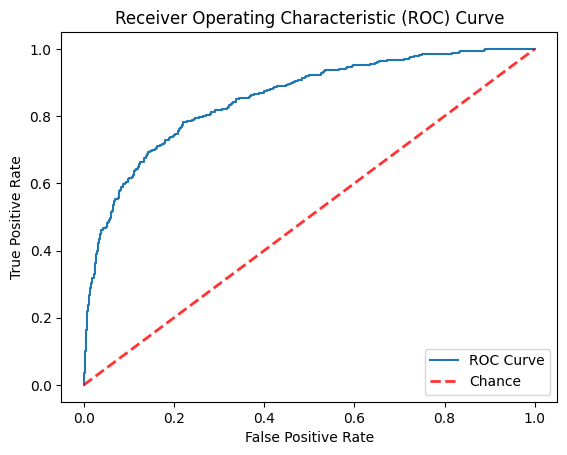

In [77]:
plot_roc_curve_custom(pipeline, X_test, y_test)

#### The ROC curve illustrates the trade-off between true positive rate and false positive rate.

In [78]:
from sklearn.metrics import precision_recall_curve

In [79]:
def plot_precision_recall_curve_custom(model, X_test, y_test):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

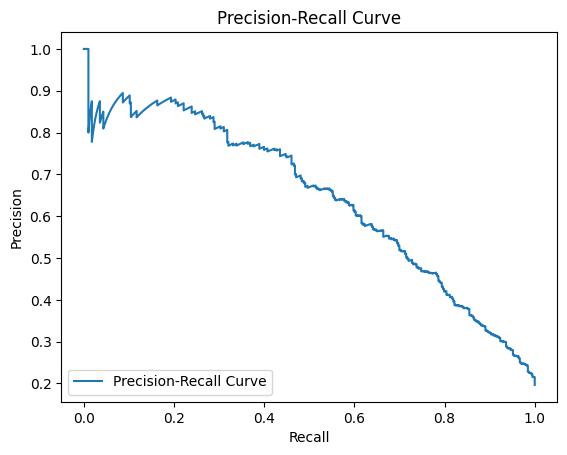

In [80]:
plot_precision_recall_curve_custom(pipeline, X_test, y_test)

#### The Precision-Recall curve demonstrates the relationship between precision and recall.

In [81]:
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_pipeline)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7559278664747582


#### The ROC AUC score of 0.7559 indicates the model's ability to distinguish between positive and negative classes, with higher values suggesting better performance.

In [82]:
# Calculate PR AUC score
pr_auc = average_precision_score(y_test, y_pred_pipeline)
print("PR AUC Score:", pr_auc)

PR AUC Score: 0.43984672788468115


#### The PR AUC score for the model is 0.4398, indicating the average precision achieved across different thresholds for positive class predictions.

In [83]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred_pipeline)
print("F1 Score:", f1)

F1 Score: 0.6034912718204489


#### The F1 score for the model is 0.6035, representing the harmonic mean of precision and recall, providing a single metric that balances both measures.

In [84]:
# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred_pipeline)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.5042606062691629


#### The Matthews Correlation Coefficient for the model is 0.5043, indicating the correlation between the observed and predicted binary classifications, with values closer to 1 suggesting better performance.

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_pipeline).ravel()

In [88]:
# Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.8960796515245799


#### The specificity of 0.8961 indicates the proportion of correctly identified negative instances out of all actual negative instances.

In [89]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_pipeline)
print("Accuracy:", accuracy)

Accuracy: 0.841


#### The accuracy of 0.841 represents the proportion of correctly classified instances out of all instances in the dataset.

In [90]:
# Calculate Precision
precision = precision_score(y_test, y_pred_pipeline)
print("Precision:", precision)

Precision: 0.5916870415647921


#### The precision of 0.5917 indicates the proportion of correctly predicted positive instances out of all instances predicted as positive by the model.

In [92]:
# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred_pipeline)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.6157760814249363


#### The recall (sensitivity) of 0.6158 represents the proportion of correctly identified positive instances out of all actual positive instances.

In [93]:
# Calculate F-beta Score (with beta=2)
fbeta = fbeta_score(y_test, y_pred_pipeline, beta=2)
print("F-beta Score (with beta=2):", fbeta)

F-beta Score (with beta=2): 0.6108026249369005


#### The F-beta score (with beta=2) of 0.6108 indicates the weighted harmonic mean of precision and recall, with higher emphasis on recall, reflecting the model's ability to balance between precision and recall.

In [97]:
from sklearn.metrics import balanced_accuracy_score

In [98]:
# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_pipeline)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.7559278664747582


#### The balanced accuracy of 0.7559 represents the average of sensitivity and specificity, indicating the model's overall ability to correctly classify both positive and negative instances, accounting for class imbalance.

### STEP 11: PIPELINE EVALUATION

In [100]:
# Additional Metrics for Pipeline
print("Pipeline Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_pipeline))
print("Classification Report:\n", classification_report(y_test, y_pred_pipeline))

Pipeline Model Evaluation:
Accuracy: 0.841
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.59      0.62      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## Pipeline Model Evaluation

- **Accuracy:** 0.841

- **Classification Report:**

|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| 0 (Non-Churned) | 0.91      | 0.90   | 0.90     | 1607    |
| 1 (Churned)     | 0.59      | 0.62   | 0.60     | 393     |


- **Explanation:**

    - **Accuracy:** The model achieved an accuracy of 0.841, indicating that 84.1% of the instances were classified correctly.

    - **Classification Report:** 
        - For non-churned customers (class 0):
            - Precision: 0.91, Recall: 0.90, F1-Score: 0.90
            - Support: 1607
        - For churned customers (class 1):
            - Precision: 0.59, Recall: 0.62, F1-Score: 0.60
            - Support: 393

    - **Macro Avg and Weighted Avg:** 
        - Macro Avg: Precision: 0.75, Recall: 0.76, F1-Score: 0.75
        - Weighted Avg: Precision: 0.84, Recall: 0.84, F1-Score: 0.84

### Conclusion

In this project, we developed a predictive model to anticipate customer churn in a subscription-based service or business. By analyzing historical customer data and employing machine learning algorithms like Random Forest, Gradient Boosting, and Logistic Regression, we aimed to identify patterns indicative of potential churn.

Through preprocessing, feature engineering, and model optimization techniques such as hyperparameter tuning and cross-validation, we enhanced the predictive performance of our models. Additionally, we evaluated model performance using various metrics including accuracy, ROC AUC score, precision, recall, and F1 score.

Ensemble methods and feature selection were also employed to improve model accuracy and interpretability. By combining multiple models and identifying key predictive features, we obtained insights into customer behavior that can aid in proactive churn management strategies.

In summary, this project highlights the utility of predictive modeling in anticipating and addressing customer churn, thereby enabling businesses to enhance customer retention efforts and maintain sustainable growth.
